# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [5]:
DATA_FOLDER = './Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [6]:
# Write your answer here
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.apionly as sns
import matplotlib.pyplot as plt

sns.set_style("dark")

/usr/local/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [58]:
def files_for_country(c):
    pattern = '{}/ebola/{}_data/*.csv'.format(DATA_FOLDER, c)
    return glob.glob(pattern)


def row_description_file_analysis(df, data_field='Description', file_field='File'):
    df = df.copy()
    df = df[[data_field, file_field]]
    df['Count'] = 1
    df = df.groupby([data_field, file_field]).sum()
    df = df.reset_index()
    pivot = df.pivot(index=data_field, columns=file_field, values='Count')
    pivot.fillna(value=0.0, inplace=True)
    return pivot
    
    
def scatter_plot_pivot(pivot, radius=40):
    """Plot a grid for columns and index of a DF with point proportional to the value"""
    n_row = len(pivot.index)
    n_col = len(pivot.columns)
    range_row = np.arange(0, n_row)
    range_col = np.arange(0, n_col)
    xs, ys = np.meshgrid(range_col, range_row, sparse=False, indexing='ij')
    fig, ax = plt.subplots(figsize=(int(n_col/4),int(n_row / 3)))
    ax.scatter(xs.ravel(), ys.ravel(), s=np.transpose(pivot.values).ravel() * radius)
    ax.set_xticklabels(pivot.columns)
    ax.xaxis.tick_top()
    plt.xticks(range_col, rotation=90)
    plt.yticks(range_row)
    ax.set_yticklabels(pivot.index)
    plt.show()


def import_df(country, with_file=True, date_fields=['Date']):
    """Parse and concat all the files for a country"""
    files = files_for_country(country)
    dfs = []
    for f in files:
        df = pd.read_csv(f, parse_dates=date_fields)
        if with_file:
            df['File'] = f
        dfs.append(df)

    df_full = pd.concat(dfs)
    df_full = df_full.fillna(0)
    df_full['Country'] = country
    return df_full

def split_year_month(df, date_field='Date'):
    """Add Year and Month column to the DF extracted from a date column"""
    df['Year'] = df[date_field].apply(lambda d: d.year)
    df['Month'] = df[date_field].apply(lambda d: d.month)

### Guinea

In [49]:
guinea = import_df('guinea')
guinea = guinea[['Date', 'Description', 'Country', 'Totals', 'File']]
guinea

,Date,Description,Country,Totals,File
0,2014-08-04,New cases of suspects,guinea,5,./Data/ebola/guinea_data/2014-08-04.csv
1,2014-08-04,New cases of probables,guinea,0,./Data/ebola/guinea_data/2014-08-04.csv
2,2014-08-04,New cases of confirmed,guinea,4,./Data/ebola/guinea_data/2014-08-04.csv
3,2014-08-04,Total new cases registered so far,guinea,9,./Data/ebola/guinea_data/2014-08-04.csv
4,2014-08-04,Total cases of suspects,guinea,11,./Data/ebola/guinea_data/2014-08-04.csv
5,2014-08-04,Total cases of probables,guinea,133,./Data/ebola/guinea_data/2014-08-04.csv
6,2014-08-04,Total cases of confirmed,guinea,351,./Data/ebola/guinea_data/2014-08-04.csv
7,2014-08-04,Cumulative (confirmed + probable + suspects),guinea,495,./Data/ebola/guinea_data/2014-08-04.csv
8,2014-08-04,New deaths registered today,guinea,2,./Data/ebola/guinea_data/2014-08-04.csv
9,2014-08-04,New deaths registered today (confirmed),guinea,2,./Data/ebola/guinea_data/2014-08-04.csv


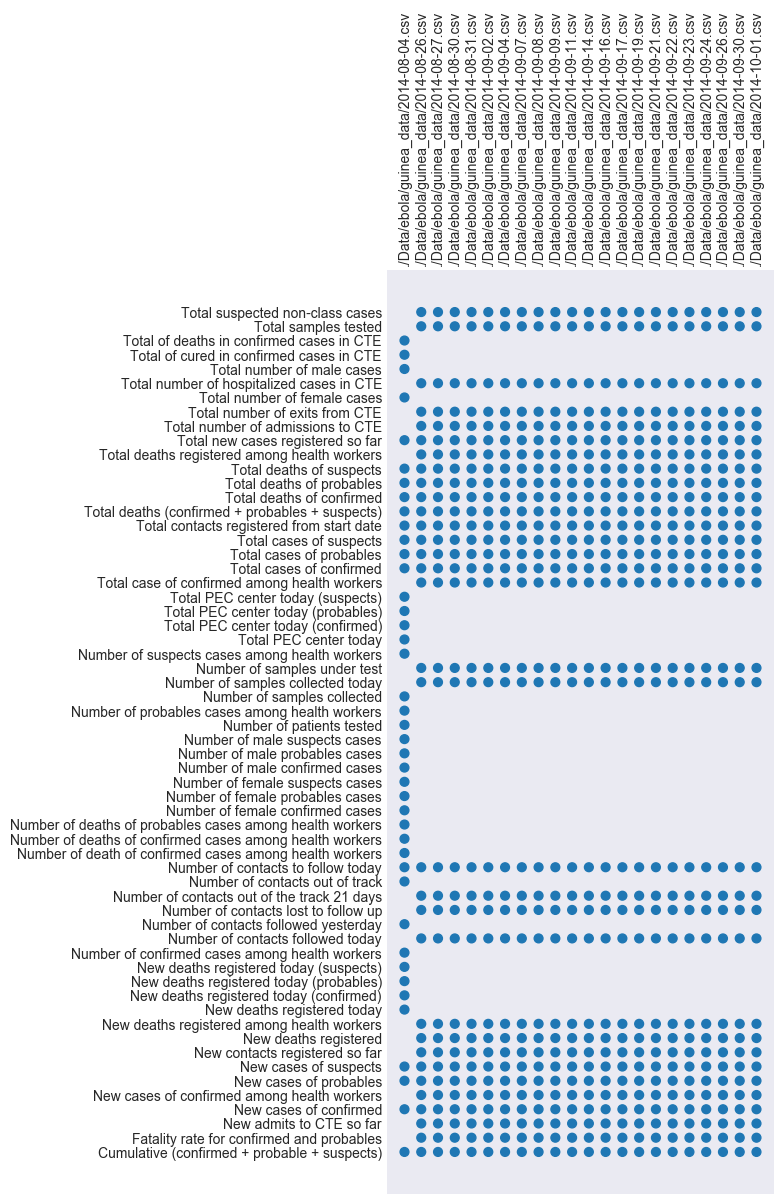

In [50]:
# Analysis of the rows in each CSV file
piv = row_description_file_analysis(guinea)
scatter_plot_pivot(piv)

In [51]:
# TODO check fields that we take into account
guinea_new_desc = ['Total new cases registered so far']
guinea_death_desc = ['New deaths registered', 'New deaths registered today']

# Unify the Description field
guinea_new_df = guinea.query('Description in @guinea_new_desc').copy()
guinea_new_df.loc[:,'Description'] = 'New case'
guinea_death_df = guinea.query('Description in @guinea_death_desc').copy()
guinea_death_df.loc[:,'Description'] = 'Death'

guinea_filtered = pd.concat([guinea_new_df, guinea_death_df])

split_year_month(guinea_filtered)
guinea_filtered.Totals = pd.to_numeric(guinea_filtered.Totals)
guinea_filtered.groupby(['Country', 'Description', 'Year', 'Month']).sum()

Totals
Country Description Year Month        
guinea  Death       2014 8          17
                         9          57
                         10         15
        New case    2014 8         129
                         9         314
                         10         34

### Liberia

In [61]:
liberia = import_df('liberia')
liberia = liberia[['Date', 'Variable', 'Country', 'National', 'File']]
liberia.columns = ['Date', 'Description', 'Country', 'Totals', 'File']
liberia

,Date,Description,Country,Totals,File
0,2014-06-16,Specimens collected,liberia,1.0,./Data/ebola/liberia_data/2014-06-16.csv
1,2014-06-16,Specimens pending for testing,liberia,0.0,./Data/ebola/liberia_data/2014-06-16.csv
2,2014-06-16,Total specimens tested,liberia,28.0,./Data/ebola/liberia_data/2014-06-16.csv
3,2014-06-16,Newly reported deaths,liberia,2.0,./Data/ebola/liberia_data/2014-06-16.csv
4,2014-06-16,Total death/s in confirmed cases,liberia,8.0,./Data/ebola/liberia_data/2014-06-16.csv
5,2014-06-16,Total death/s in probable cases,liberia,6.0,./Data/ebola/liberia_data/2014-06-16.csv
6,2014-06-16,Total death/s in suspected cases,liberia,2.0,./Data/ebola/liberia_data/2014-06-16.csv
7,2014-06-16,"Total death/s in confirmed, probable, suspecte...",liberia,16.0,./Data/ebola/liberia_data/2014-06-16.csv
8,2014-06-16,Case Fatality Rate (CFR) - Confirmed & Probabl...,liberia,0.0,./Data/ebola/liberia_data/2014-06-16.csv
9,2014-06-16,Newly reported contacts,liberia,41.0,./Data/ebola/liberia_data/2014-06-16.csv


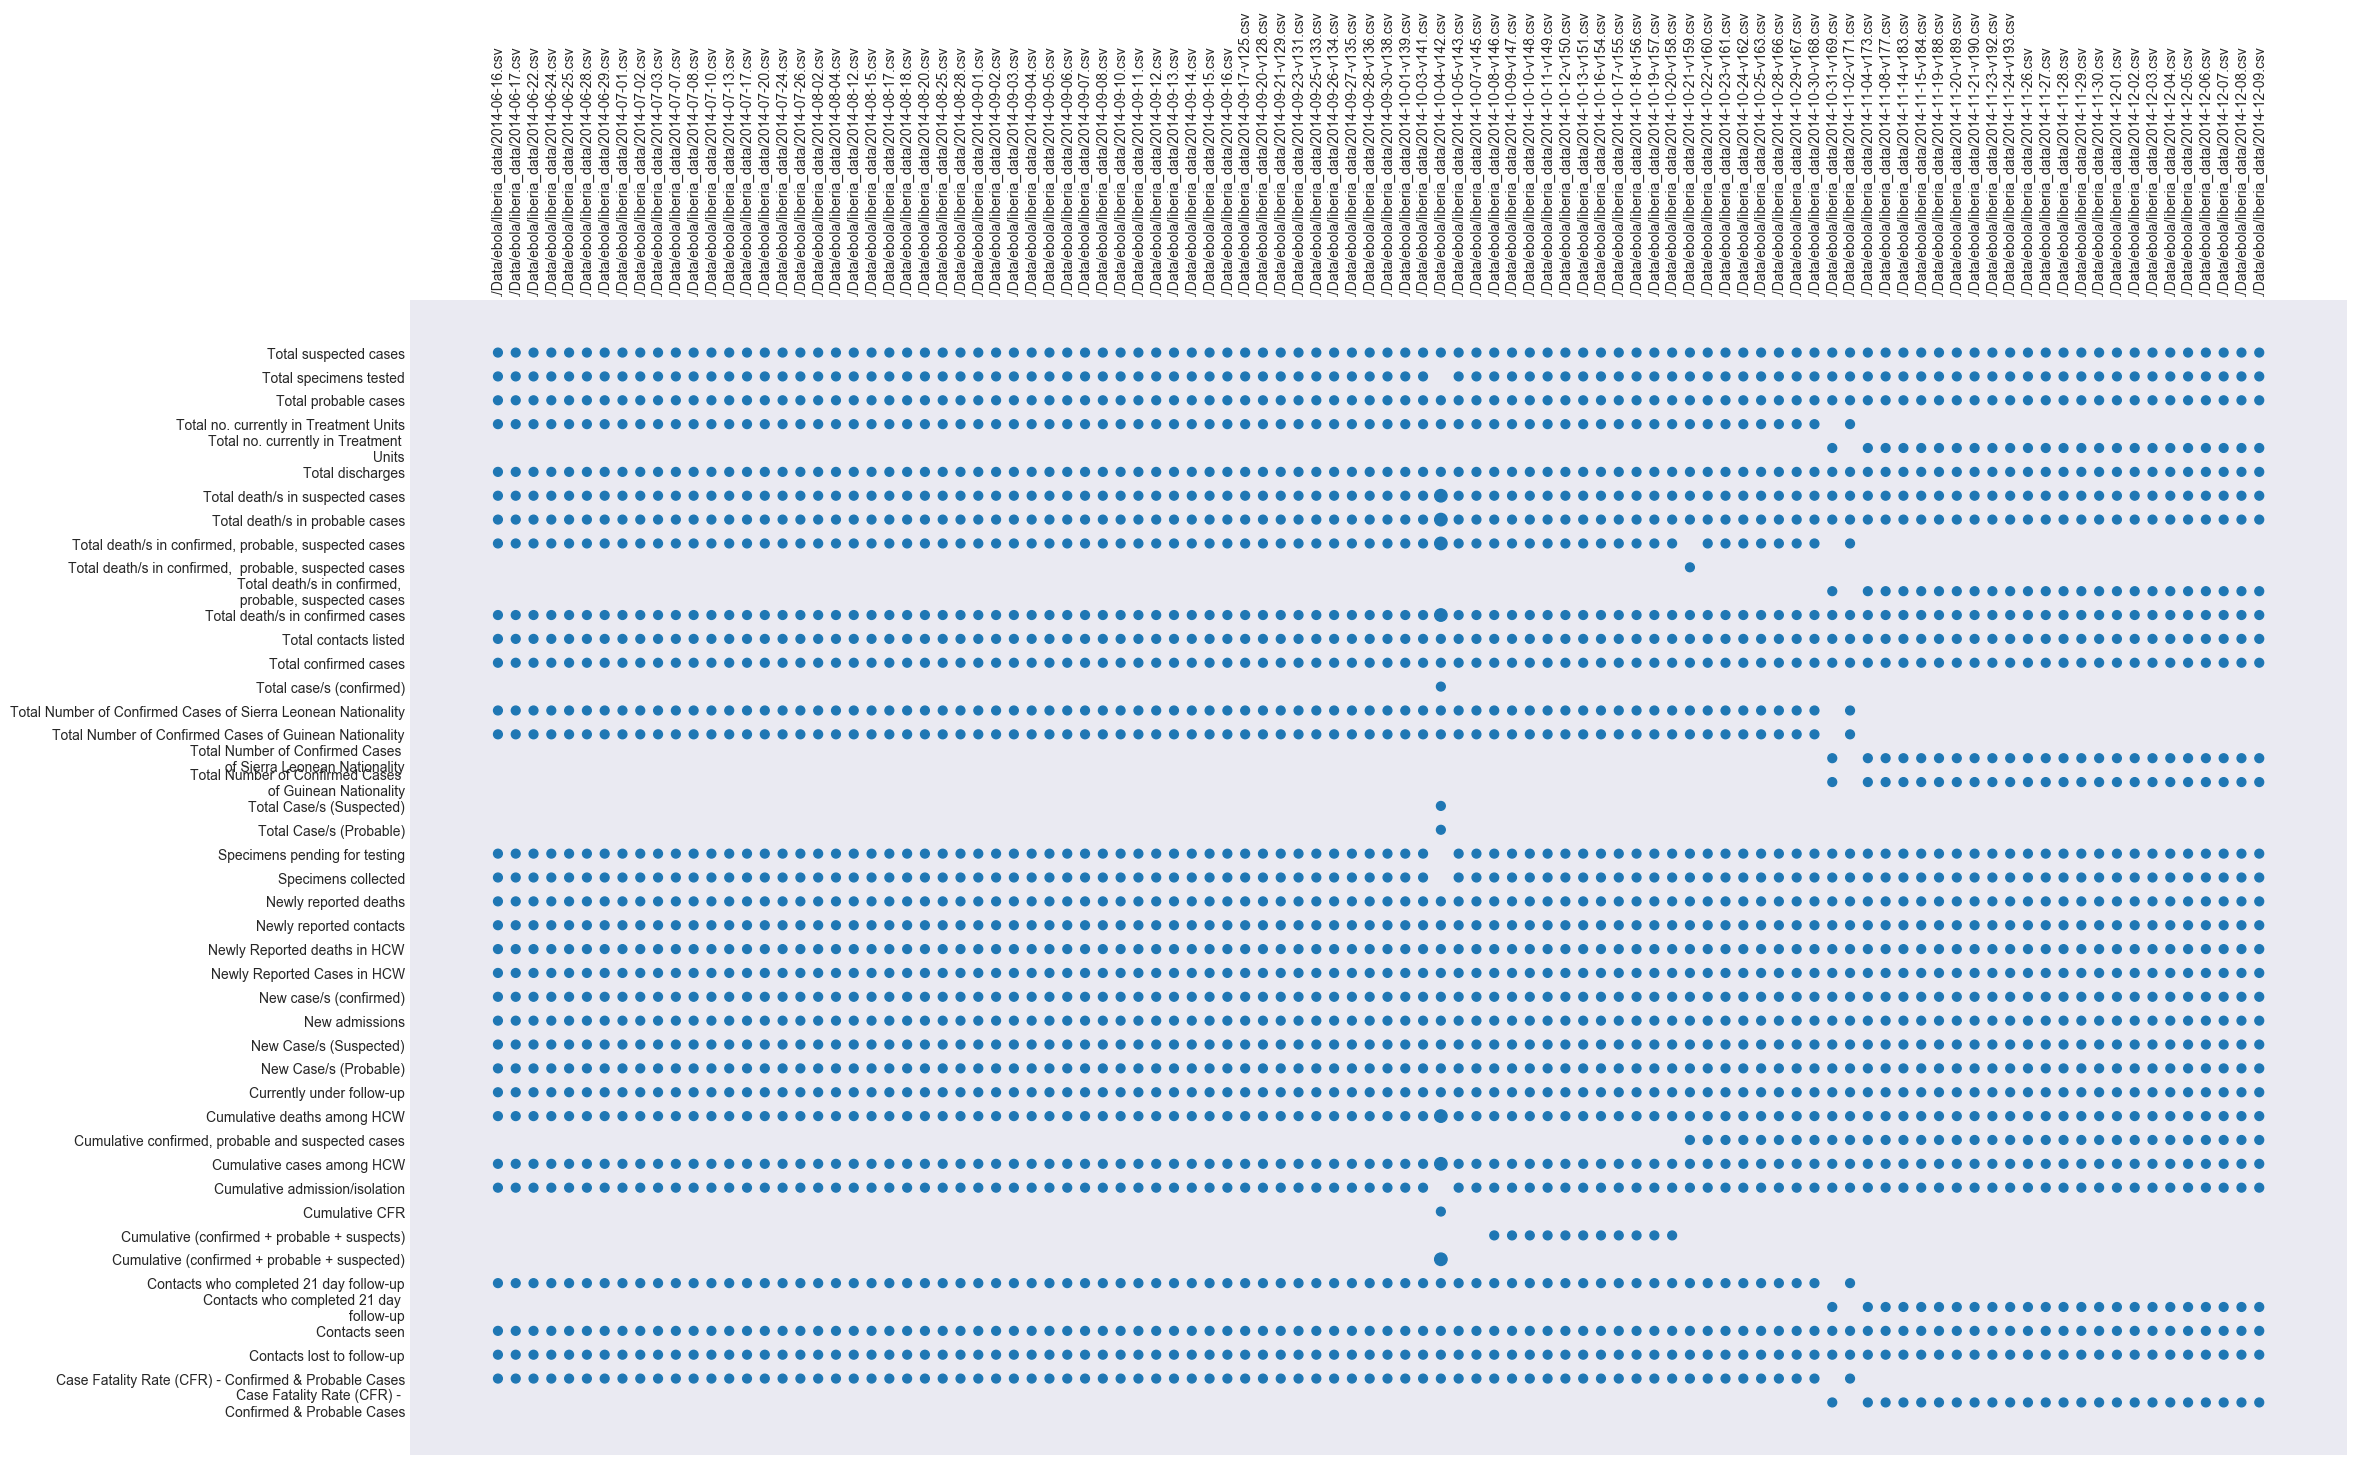

In [62]:
# Analysis of the rows in each CSV file
piv = row_description_file_analysis(liberia)
scatter_plot_pivot(piv) 

In [60]:


liberia_death_desc = ['Newly reported deaths']
liberia_death_df = liberia.query('Description in @liberia_death_desc').copy()
liberia_death_df.Description = 'Death'

liberia_new_desc = ['New case/s (confirmed)', 'New Case/s (Probable)', 'New Case/s (Suspected)']
liberia_new_df = liberia.query('Description in @liberia_new_desc').copy()
liberia_new_df.Description = 'New case'

liberia_filtered = pd.concat([liberia_death_df, liberia_new_df])
liberia_filtered.Totals = pd.to_numeric(liberia_filtered.Totals)
split_year_month(liberia_filtered)
liberia_filtered.groupby(['Country', '', 'Year', 'Month']).sum()

UndefinedVariableError: name 'Description' is not defined

In [20]:
files = files_for_country('sl')
dfs = []
for f in files:
    df = pd.read_csv(f, parse_dates=['date'])
    df['File'] = f
    dfs.append(df)
sl = pd.concat(dfs)
sl = sl[['date', 'variable', 'National', 'File']]
sl.columns = ['Date', 'Description', 'Totals', 'File']
sl = sl.fillna(0)
sl['Country'] = 'Sierra Leone'
sl

,Date,Description,Totals,File,Country
0,2014-08-12,population,6348350,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone
1,2014-08-12,new_noncase,4,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone
2,2014-08-12,new_suspected,10,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone
3,2014-08-12,new_probable,1,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone
4,2014-08-12,new_confirmed,11,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone
5,2014-08-12,cum_noncase,657,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone
6,2014-08-12,cum_suspected,46,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone
7,2014-08-12,cum_probable,37,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone
8,2014-08-12,cum_confirmed,717,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone
9,2014-08-12,death_suspected,5,./Data/ebola/sl_data/2014-08-12-v77.csv,Sierra Leone


In [22]:
print('Number of files for SL:', len(files_for_country('sl')))
sl.Description.value_counts()

Number of files for SL: 103


death_probable            103
death_suspected           103
etc_new_discharges        103
death_confirmed           103
etc_cum_discharges        103
new_probable              103
contacts_ill              103
contacts_healthy          103
population                103
etc_cum_admission         103
contacts_followed         103
etc_cum_deaths            103
etc_currently_admitted    103
etc_new_admission         103
contacts_not_seen         103
cum_confirmed             103
new_completed_contacts    103
cum_noncase               103
new_noncase               103
new_contacts              103
new_suspected             103
cum_completed_contacts    103
etc_new_deaths            103
cum_probable              103
new_confirmed             103
cfr                       103
percent_seen              103
cum_suspected             103
cum_contacts              103
positive_corpse            35
negative_corpse            35
pending                    35
total_lab_samples          34
new_negati

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [10]:
# Write your answer here

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [ ]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [ ]:
# Write your answer here